In [3]:
import numpy as np
import sympy as smp
from sympy import symbols, Eq, solve
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from tabulate import tabulate
import matplotlib

from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy
import uncertainties as unc

In [117]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [4]:
def load(name):
    n, typ = np.genfromtxt(name, delimiter = ' ' ,unpack = True)
    return n

#def gauss(x,sig,mu,a):
 #   return a/(sig*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sig**2))
    
def gauss(x,b,c):
    return (1/(c*np.sqrt(2*np.pi)))*np.exp(-(x-b)**2/(2*c**2)) 

In [5]:
def Tab(*args):
    
    n = len(args[0])
    
    for i in range(n):
        
        for col in args[0:-1]:
            print("${:.1uL}$ &".format(col[i]), end='')
        
        print(r"${:.1uL}$ \\".format(args[-1][i]))

# Invariant m hist.

In [6]:
N1 = load('Spektrum/m_p.txt')
N2 = load('Spektrum/m_q.txt')
N = np.concatenate((N1,N2))
N0 = load('Spektrum/Invariant_Masses100.txt')

N100 = load('Spektrum/Invariant_Masses100.txt')
N50 = load('Spektrum/Invariant_Masses50.txt')
N25 = load('Spektrum/Invariant_Masses25.txt')
N75 = N100[:-len(N25)]
len(N25),len(N100),len(N75)

(45, 151, 106)

## 100 procent

In [7]:
# nastavenie poctu binov a hranic oblasti, v ktorej budeme hladat Higgsa
nbins = 25
x_min = 80
x_max = 100

pts = N100

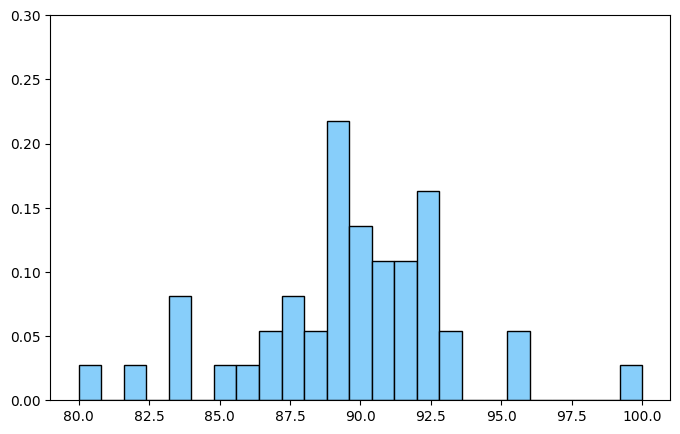

In [8]:
plt.figure(figsize = (8,5))

count, bins, ignored = plt.hist(pts, nbins, density=True, edgecolor="k", color = 'lightskyblue', range=(x_min,x_max))

plt.ylim(0,0.3)
plt.show()

In [9]:
dist_pts = np.linspace(x_min, x_max, nbins)
density, bins = np.histogram(pts, bins=np.linspace(x_min, x_max, nbins+1), density=True)

In [10]:
params, err = curve_fit(gauss,dist_pts,density,p0 = [90,12])
b1,c1 = params
sb1,sc1 = np.sqrt(np.diag(err))

p1 = [b1,c1]
sp1 = [sb1,sc1]

print(b1,c1)
print(sb1,sc1)

90.15788354419892 2.6373101806285977
0.3714144497838412 0.3032595551070611


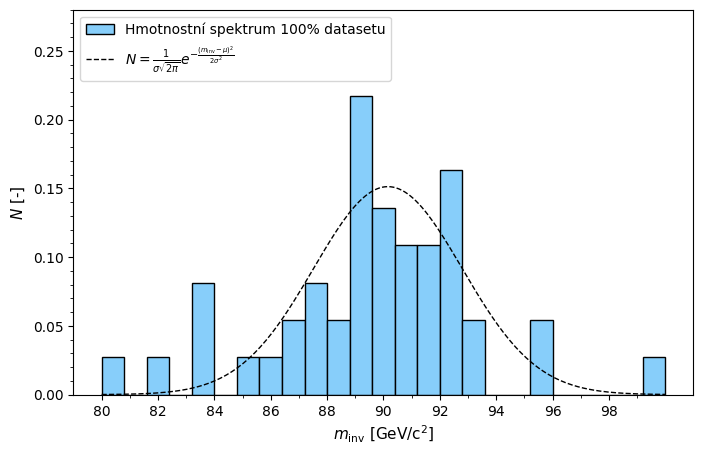

In [11]:
plt.figure(figsize = (8,5))

x_range = np.linspace(x_min,x_max,200)

count, bins, ignored = plt.hist(pts, nbins, density=True, edgecolor="k", color = 'lightskyblue', range=(x_min,x_max), label = "Hmotnostní spektrum 100% datasetu")

plt.plot(x_range, gauss(x_range,b1,c1) ,lw = 1 , color = 'k', linestyle = 'dashed', label = r"$N = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(m_\mathrm{inv}-\mu)^{2}}{2\sigma^{2}}}$")

plt.legend(loc='upper left',fontsize=10)

plt.ylim(0,0.28)

plt.xticks(np.arange(80,100,1), minor = True)
plt.xticks(np.arange(80,100,2))
plt.yticks(np.arange(0,.28,.01), minor = True)

plt.ylabel("$N$ " + "[-]", fontsize=11)
plt.xlabel("$m_\mathrm{inv}$ [GeV/c$^2$]", fontsize=11)

plt.savefig('100.pdf', bbox_inches = 'tight')
plt.show()

## 75 procent

In [132]:
# nastavenie poctu binov a hranic oblasti, v ktorej budeme hladat Higgsa
nbins = 25
x_min = 80
x_max = 100

pts = N75

In [133]:
plt.figure(figsize = (8,5))

count, bins, ignored = plt.hist(pts, nbins, density=True, edgecolor="k", color = 'lightskyblue', range=(x_min,x_max))

plt.ylim(0,0.3)
plt.show()

C:\Users\stepa\AppData\Local\Temp/ipykernel_12684/1302097611.py:6: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [134]:
dist_pts = np.linspace(x_min, x_max, nbins)
density, bins = np.histogram(pts, bins=np.linspace(x_min, x_max, nbins+1), density=True)

In [135]:
params, err = curve_fit(gauss,dist_pts,density,p0 = [90,12])
b2,c2 = params
sb2,sc2 = np.sqrt(np.diag(err))

p2 = [b2,c2]
sp2 = [sb2,sc2]

print(b2,c2)
print(sb2,sc2)

90.7039259276404 2.476577619221032
0.45261882641416834 0.3695623488626433


In [136]:
plt.figure(figsize = (8,5))

x_range = np.linspace(x_min,x_max,200)

count, bins, ignored = plt.hist(pts, nbins, density=True, edgecolor="k", color = 'lightskyblue', range=(x_min,x_max), label = "Hmotnostní spektrum 75% datasetu")

plt.plot(x_range, gauss(x_range,b2,c2), lw = 1 , color = 'k', linestyle = 'dashed', label = r"$N = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(m_\mathrm{inv}-\mu)^{2}}{2\sigma^{2}}}$")

plt.legend(loc='upper left',fontsize=10)

plt.ylim(0,0.28)

plt.xticks(np.arange(80,100,1), minor = True)
plt.xticks(np.arange(80,100,2))
plt.yticks(np.arange(0,.28,.01), minor = True)

plt.ylabel("$N$ " + "[-]", fontsize=11)
plt.xlabel("$m_\mathrm{inv}$ [GeV/c$^2$]", fontsize=11)

plt.savefig('75.pdf', bbox_inches = 'tight')
plt.show()

C:\Users\stepa\AppData\Local\Temp/ipykernel_12684/3859347493.py:21: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


## 50 procent

In [137]:
# nastavenie poctu binov a hranic oblasti, v ktorej budeme hladat Higgsa
nbins = 20
x_min = 80
x_max = 100

pts = N50

In [138]:
plt.figure(figsize = (8,5))

count, bins, ignored = plt.hist(pts, nbins, density=True, edgecolor="k", color = 'lightskyblue', range=(x_min,x_max))

plt.ylim(0,0.3)
plt.show()

C:\Users\stepa\AppData\Local\Temp/ipykernel_12684/1302097611.py:6: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [139]:
dist_pts = np.linspace(x_min, x_max, nbins)
density, bins = np.histogram(pts, bins=np.linspace(x_min, x_max, nbins+1), density=True)

In [140]:
params, err = curve_fit(gauss,dist_pts,density,p0 = [90,12])
b3,c3 = params
sb3,sc3 = np.sqrt(np.diag(err))

p3 = [b3,c3]
sp3 = [sb3,sc3]

print(b3,c3)
print(sb3,sc3)

91.31150895296004 2.11694172853443
0.38537992799033627 0.3146614090476777


In [141]:
plt.figure(figsize = (8,5))

x_range = np.linspace(x_min,x_max,200)

count, bins, ignored = plt.hist(pts, nbins, density=True, edgecolor="k", color = 'lightskyblue', range=(x_min,x_max), label = "Hmotnostní spektrum 50% datasetu")

plt.plot(x_range, gauss(x_range,b3,c3) , color = 'k', linestyle = 'dashed',lw = 1, label = r"$N = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(m_\mathrm{inv}-\mu)^{2}}{2\sigma^{2}}}$")

plt.legend(loc='upper left',fontsize=10)

plt.ylim(0,0.35)

plt.xticks(np.arange(80,100,1), minor = True)
plt.xticks(np.arange(80,100,2))
plt.yticks(np.arange(0,.35,.01), minor = True)

plt.ylabel("$N$ " + "[-]", fontsize=11)
plt.xlabel("$m_\mathrm{inv}$ [GeV/c$^2$]", fontsize=11)

plt.savefig('50.pdf', bbox_inches = 'tight')
plt.show()

C:\Users\stepa\AppData\Local\Temp/ipykernel_12684/639868733.py:21: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


## 25 procent

In [142]:
# nastavenie poctu binov a hranic oblasti, v ktorej budeme hladat Higgsa
nbins = 15
x_min = 70
x_max = 110

pts = N25

In [143]:
plt.figure(figsize = (8,5))

count, bins, ignored = plt.hist(pts, nbins, density=True, edgecolor="k", color = 'lightskyblue', range=(x_min,x_max))

plt.ylim(0,0.3)
plt.show()

C:\Users\stepa\AppData\Local\Temp/ipykernel_12684/1302097611.py:6: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [144]:
dist_pts = np.linspace(x_min, x_max, nbins)
density, bins = np.histogram(pts, bins=np.linspace(x_min, x_max, nbins+1), density=True)

In [145]:
params, err = curve_fit(gauss,dist_pts,density,p0 = [90,12])
b4,c4 = params
sb4,sc4 = np.sqrt(np.diag(err))

p1 = [b4,c4]
sp1 = [sb4,sc4]

print(b4,c4)
print(sb4,sc4)

90.6340930503354 4.721611251342408
1.0159235032001996 0.8294980946051385


In [146]:
plt.figure(figsize = (8,5))

x_range = np.linspace(x_min,x_max,200)

count, bins, ignored = plt.hist(pts, nbins, density=True, edgecolor="k", color = 'lightskyblue', range=(x_min,x_max), label = "Hmotnostní spektrum 25% datasetu")

plt.plot(x_range, gauss(x_range,b4,c4) ,lw = 1 , color = 'k', linestyle = 'dashed', label = r"$N = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(m_\mathrm{inv}-\mu)^{2}}{2\sigma^{2}}}$")

plt.legend(loc='upper left',fontsize=10)

plt.ylim(0,0.17)

plt.xticks(np.arange(70,110,1), minor = True)
plt.xticks(np.arange(70,110,5))
plt.yticks(np.arange(0,.17,.01), minor = True)

plt.ylabel("$N$ " + "[-]", fontsize=11)
plt.xlabel("$m_\mathrm{inv}$ [GeV/c$^2$]", fontsize=11)

plt.savefig('25.pdf', bbox_inches = 'tight')
plt.show()

C:\Users\stepa\AppData\Local\Temp/ipykernel_12684/4032466095.py:21: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


## Tabulka

In [155]:
n = np.array([25,50,75,100])
n_ud = np.array([len(N25),len(N50),len(N75),len(N100)])
mu = unumpy.uarray([b4,b3,b2,b1], [sb4,sb3,sb2,sb1])
sig = unumpy.uarray([c4,c3,c2,c1], [sc4,sc3,sc2,sc1])

smu = [sb4,sb3,sb2,sb1]
ssig = np.array([sc4,sc3,sc2,sc1])

In [156]:
n_ud

array([ 45,  82, 106, 151])

In [157]:
sig_mu = sig/(n)**0.5
sig_mu

array([0.9443222502684817+/-0.1658996189210277,
       0.29938077032469335+/-0.04449984322306539,
       0.28597055102525304+/-0.04267338431963949,
       0.26373101806285976+/-0.030325955510706118], dtype=object)

In [158]:
sig_mu = sig/(n_ud)**0.5
sig_mu

array([0.7038562480886313+/-0.12365427511624275,
       0.2337771056935806+/-0.03474853959799657,
       0.24054648285798003+/-0.03589506847098286,
       0.21462125871952345+/-0.02467891259582028], dtype=object)

In [159]:
    for i in range(4):
        
        print(r"${}$ & ${:.1uL}$ & ${:.1uL}$ & ${:.1uL}$ \\".format(n[i], mu[i], sig[i], sig_mu[i]))

$25$ & $91 \pm 1$ & $4.7 \pm 0.8$ & $0.7 \pm 0.1$ \\
$50$ & $91.3 \pm 0.4$ & $2.1 \pm 0.3$ & $0.23 \pm 0.03$ \\
$75$ & $90.7 \pm 0.5$ & $2.5 \pm 0.4$ & $0.24 \pm 0.04$ \\
$100$ & $90.2 \pm 0.4$ & $2.6 \pm 0.3$ & $0.21 \pm 0.02$ \\


## Grafy Parametru

In [151]:
plt.figure(figsize = (8,5))

x_range = np.linspace(x_min,x_max,200)

plt.scatter(n, smu, marker = '+', color = 'k', label = "Chyba $\mu$ z proložení")
plt.errorbar(n, unumpy.nominal_values(sig_mu),yerr = unumpy.std_devs(sig_mu) ,elinewidth=.4, fmt = 'kx', linestyle = None, ecolor = "k",capsize=3, label = "Vypočtená chyba $\mu$")

#plt.plot(x_range, gauss(x_range,b4,c4) ,lw = 1 , color = 'k', linestyle = 'dashed', label = r"$N = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(m_\mathrm{inv}-\mu)^{2}}{2\sigma^{2}}}$")

plt.legend(loc='upper right',fontsize=10)

#plt.ylim(0,0.17)

plt.xticks(np.arange(20,110,5), minor = True)
#plt.xticks(np.arange(70,110,5))
plt.yticks(np.arange(0.2,1.2,.1), minor = True)

plt.ylabel("$\sigma_{\mu}$ " + "[GeV/c$^2$]", fontsize=11)
plt.xlabel("$N$ [%]", fontsize=11)

plt.savefig('mu.pdf', bbox_inches = 'tight')
plt.show()

C:\Users\stepa\AppData\Local\Temp/ipykernel_12684/882822725.py:22: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


# Higgs

In [122]:
# exponencialna funckia na popis pozadi
def exponential_bg(x, A, K):
	return K*np.exp( - A * x)

def exponential(x, A):
	return np.exp( - A * x)

# normalizacia exponencialnej funkcie
def norm_exp(A,K, x_min, x_max):
	return K*np.exp(-x_min*A)-np.exp(-x_max*A)

In [123]:
def probability_density(x, S, B):
    s_1 = S/(S+B)
    s_2 = (B/(S+B))*exponential_bg(x, A, K)/norm_exp(A, K,np.min(x),np.max(x))
    pdf = s_1* (1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - m0)**2 / (2*sigma**2))) + s_2
    return pdf

In [124]:
def likelihood(params, x):
    
    S,B = params
    
    n = len(x)
    
    prob = probability_density(x, S, B)
    
    ln_prob = np.log(prob)
    
    log_factorial = n*np.log(n) - n 																																		                
    
    log_lik_val = ln_prob.sum()  + n * np.log(S+B) - (S+B) - log_factorial
    
    return -log_lik_val

## Import + nastaveni

In [125]:
E = np.genfromtxt('data_real.txt',unpack = True)

In [126]:
# nastavenie poctu binov a hranic oblasti, v ktorej budeme hladat Higgsa
nbins = 50
x_min = 105
x_max = 155

m0 = 125.35
sigma = 1.46

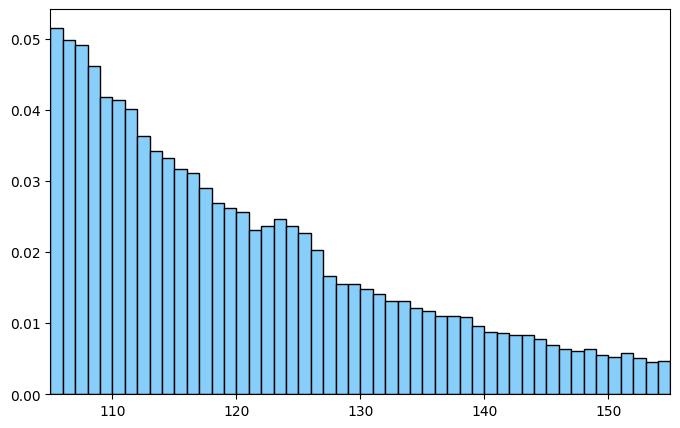

In [127]:
plt.figure(figsize = (8,5))

count, bins, ignored = plt.hist(E, nbins, density=True, edgecolor="k", color = 'lightskyblue', range=(x_min,x_max))
plt.xlim(x_min,x_max)

plt.show()

In [128]:
dist_pts = np.linspace(x_min, x_max, nbins)
density, bins = np.histogram(E, bins=np.linspace(x_min, x_max, nbins+1), density=True)

## Fit BG

In [129]:
params, err = curve_fit(exponential_bg, dist_pts, density, p0 = [0.06,7])
A,K = params
sA,sK = np.sqrt(np.diag(err))

print(A,K)
print(sA,sK)

0.048191291032807074 8.286703132132052
0.0006362485259714737 0.6057219092519139


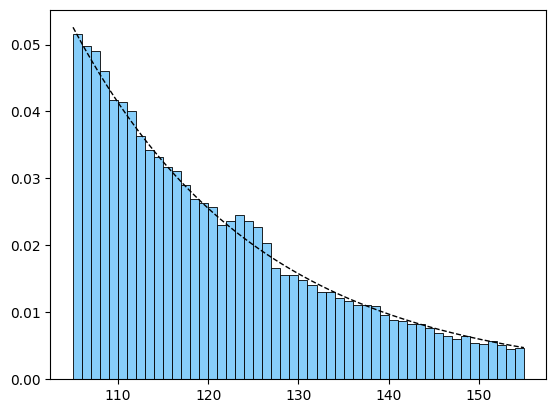

In [130]:
x_range = np.linspace(x_min,x_max, 200)

plt.hist(E, nbins, density=True, edgecolor="k", lw = 0.6 ,color = 'lightskyblue', range=(x_min,x_max))
plt.plot(x_range, exponential_bg(x_range,A,K) ,lw = 1 , color = 'k', linestyle = 'dashed')

## FIT

In [131]:
params, err = curve_fit(probability_density, dist_pts, density)
S,B = params
sS,sB = np.sqrt(np.diag(err))

print(S,B)
print(sS,sB)

2.300365711155093 0.08322423580158131
23767887.3833174 860145.7785532911


In [132]:
n = len(E)

S_init = 0.006*n
B_init = 0.99*n

params_init = np.array([S_init, B_init])

bnds = ((0.005*n, 0.015*n), (0.95*n, n))

# minimalizacia likelihoodu
results = minimize(likelihood, x0 = (S_init, B_init), args = E,bounds = bnds ,method='TNC', options={"maxiter":2000})

C:\Users\stepa\AppData\Local\Temp/ipykernel_11896/2553984987.py:11: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  results = minimize(likelihood, x0 = (S_init, B_init), args = E,bounds = bnds ,method='TNC', options={"maxiter":2000})


In [133]:
S,B = results.x
S,B

(175.0, 34769.38996903132)

In [134]:
results.message

'Local minimum reached (|pg| ~= 0)'

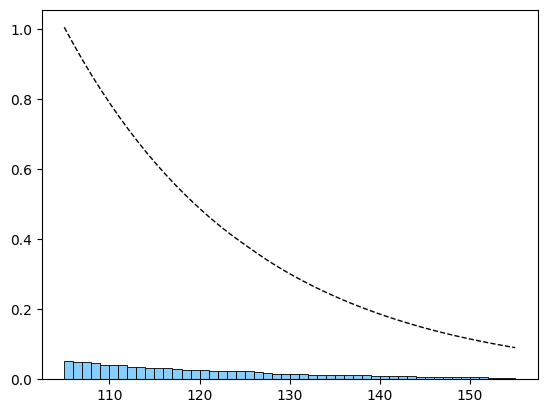

In [136]:
x_range = np.linspace(x_min,x_max, 200)

plt.hist(E, nbins, density=True, edgecolor="k", lw = 0.6 ,color = 'lightskyblue', range=(x_min,x_max))
plt.plot(dist_pts, probability_density(dist_pts,S,B) ,lw = 1 , color = 'k', linestyle = 'dashed')

In [ ]:
396.68804942,34650

In [ ]:
# vypocet -log(L)
def likelihood(params, *args):
	nu_s, nu_b = params
	xvals = args[0]
	pdf_vals = probability_density(xvals, nu_s, nu_b, m0, sigma)
	ln_pdf_vals = np.log(pdf_vals)
#############################################################################################################
#   likelihood obsahuje v menovateli n!. Pri vypocte tak dostavame log(n!), co je vsak pri velkom mnozstve  #
#   dat velmi neprakticke na vypocet. Nahradte preto log(n!) pomocou Stirlingovej aproximacie               #
	log_factorial =																																		                
#############################################################################################################
	log_lik_val = ln_pdf_vals.sum()  + n * np.log(nu_s+nu_b) - (nu_s+nu_b) - log_factorial
	return -log_lik_val

# inicializacia minimalizacie - uvodne hodnoty parametrov nu_s a nu_b
nu_s_init = 0.01*n
nu_b_init = 0.99*n
params_init = np.array([nu_s_init, nu_b_init])
# limity hodnot parametrov nu_s a nu_b pri minimalizacii
bnds = ((0.005*n, 0.015*n), (0.95*n, n))

# minimalizacia likelihoodu
results_uncstr = opt.minimize(likelihood, params_init, args=pts, method='TNC', bounds=bnds, options={"maxiter":2000})

# vysledne hodnoty minimalizacie vlozime do novych premennych
nu_s_fin, nu_b_fin = results_uncstr.x

In [305]:
dist_pts = np.linspace(x_min, x_max, nbins)
density, bins = np.histogram(pts, bins=np.linspace(x_min, x_max, nbins+1), density=True)

In [306]:
params, err = curve_fit(gauss,dist_pts,density,p0 = [90,12])
b4,c4 = params
sb4,sc4 = np.sqrt(np.diag(err))

p1 = [b4,c4]
sp1 = [sb4,sc4]

print(b4,c4)
print(sb4,sc4)

90.6340930503354 4.721611251342408
1.0159235032001996 0.8294980946051385


In [307]:
plt.figure(figsize = (8,5))

x_range = np.linspace(x_min,x_max,200)

count, bins, ignored = plt.hist(pts, nbins, density=True, edgecolor="k", color = 'lightskyblue', range=(x_min,x_max), label = "Hmotnostní spektrum 25% datasetu")

plt.plot(x_range, gauss(x_range,b4,c4) ,lw = 1 , color = 'k', linestyle = 'dashed', label = r"$N = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(m_\mathrm{inv}-\mu)^{2}}{2\sigma^{2}}}$")

plt.legend(loc='upper left',fontsize=10)

plt.ylim(0,0.17)

plt.xticks(np.arange(70,110,1), minor = True)
plt.xticks(np.arange(70,110,5))
plt.yticks(np.arange(0,.17,.01), minor = True)

plt.ylabel("$N$ " + "[-]", fontsize=11)
plt.xlabel("$m_\mathrm{inv}$ [GeV/c$^2$]", fontsize=11)

plt.savefig('25.pdf', bbox_inches = 'tight')
plt.show()

C:\Users\stepa\AppData\Local\Temp/ipykernel_23116/4032466095.py:21: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [1]:
a = np.array([1,2,3,4,5])
a.sum()

NameError: name 'np' is not defined

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import scipy.stats as sts
import math
import scipy.optimize as opt
import sys
from scipy.stats.distributions import chi2

plt.figure(figsize = (8,5))

# inicializacia pola, do ktoreho ulozime data
pts = pd.DataFrame([])
pd.set_option('display.max_rows', pts.shape[0]+1)

# nastavenie poctu binov a hranic oblasti, v ktorej budeme hladat Higgsa
nbins = 50
x_min = 105
x_max = 155

# exponencialna funckia na popis pozadi
def exponential(x, A, B):
	return A * np.exp( - B * x)

# normalizacia exponencialnej funkcie
def norm_exp(A, B, xmin, xmax):
	return A*(np.exp(-xmin*B)-np.exp(-xmax*B))/B

# nacitanie suboru s datami a ulozenie dat do pola
path = "data_real.txt"  # tady se nastavuje cesta k souboru (relativni ke slozce ze ktere skript zpoustite) s nasimulovanymi hodnotami data_real.txt
file = pd.read_csv(path, sep=" ", header=None, names=["mass"])
pts = pts.append(file, ignore_index=True)
pts = np.array(pts["mass"])
pts = np.sort(pts)

# inicializacia histogramu
count, bins, ignored = plt.hist(pts, nbins, density=True, edgecolor="k", lw = 0.6 ,color = 'lightskyblue', range=(x_min,x_max))
data_entries, bins = np.histogram(pts, bins=np.linspace(x_min, x_max, nbins+1), density=True)


# inicializacia pola s x-ovymi hodnotami
dist_pts = np.linspace(x_min, x_max, nbins)
binscenters = np.array([0.5 * (dist_pts[i] + dist_pts[i+1]) for i in range(len(dist_pts)-1)])
n = len(pts)

# nacitanie hmotnosti z prikazoveho riadku
m0 = 125.15

# sirka gaussovho rozdelenie - pevna hodnota
sigma = 1.46

# rychle nafitovanie dat pre zistenie parametrov exponencialneho pozadia
#############################################################################################################
#  	zvolte parametry pocatecni hodnoty parametru fitu A a B doplnenim p0=[ , ] na nasledujicim radku        #
#############################################################################################################
popt, pcov = opt.curve_fit(exponential, xdata=dist_pts, ydata=data_entries, p0 = [7,0.06])
print(popt)
A, B = popt

# funkcia, ktora vracia hustotu pravdepodobnosti
def probability_density(xvals, nu_s, nu_b, m0, sigma):
	s_1 = (nu_s)/(nu_s+nu_b)
	s_2 = ((nu_b)/(nu_s+nu_b))*exponential(xvals, A, B)/norm_exp(A, B, np.min(xvals), np.max(xvals))
	pdf = s_1*(1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (xvals - m0)**2 / (2 * sigma**2))) + s_2
	return pdf

# vypocet -log(L)
def likelihood(params, *args):
	nu_s, nu_b = params
	xvals = args[0]
	pdf_vals = probability_density(xvals, nu_s, nu_b, m0, sigma)
	ln_pdf_vals = np.log(pdf_vals)
#############################################################################################################
#   likelihood obsahuje v menovateli n!. Pri vypocte tak dostavame log(n!), co je vsak pri velkom mnozstve  #
#   dat velmi neprakticke na vypocet. Nahradte preto log(n!) pomocou Stirlingovej aproximacie               #
	log_factorial =	n*np.log(n) - n																																	                
#############################################################################################################
	log_lik_val = ln_pdf_vals.sum()  + n * np.log(nu_s+nu_b) - (nu_s+nu_b) - log_factorial
	return -log_lik_val

# inicializacia minimalizacie - uvodne hodnoty parametrov nu_s a nu_b
nu_s_init = 0.01*n
nu_b_init = 0.99*n
params_init = np.array([nu_s_init, nu_b_init])
# limity hodnot parametrov nu_s a nu_b pri minimalizacii
bnds = ((0.005*n, 0.015*n), (0.95*n, n))

# minimalizacia likelihoodu
results_uncstr = opt.minimize(likelihood, params_init, args=pts, method='TNC', bounds=bnds, options={"maxiter":2000})

# vysledne hodnoty minimalizacie vlozime do novych premennych
nu_s_fin, nu_b_fin = results_uncstr.x
print(results_uncstr.x)
# vykreslenie so sginalom a bez signalu



[8.28670313 0.04819129]
[  396.68804942 34650.        ]


C:\Users\stepa\AppData\Local\Temp/ipykernel_12684/1036061818.py:90: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  results_uncstr = opt.minimize(likelihood, params_init, args=pts, method='TNC', bounds=bnds, options={"maxiter":2000})


In [122]:
plt.figure(figsize = (8,5))

plt.hist(pts, nbins, density=True, edgecolor="k", lw = 0.6 ,color = 'lightskyblue', range=(x_min,x_max), label = 'Naměřené spektrum')

plt.plot(dist_pts, probability_density(dist_pts, nu_s_fin, nu_b_fin, m0, sigma) ,lw = 1.4 , color = 'k', linestyle = 'dashed', label = "Fit signál+pozadí")

#plt.plot(dist_pts, probability_density(dist_pts, nu_s_fin, nu_b_fin, m0, sigma) - probability_density(dist_pts, 0, nu_b_fin, m0, sigma),lw = 1, linestyle = "dotted" , color = 'k')

plt.plot(dist_pts, probability_density(dist_pts, 0, nu_b_fin, m0, sigma) ,lw = 1.2 , color = 'steelblue', linestyle = 'dashed', label = "Fit pozadí")

plt.legend(loc='upper right',fontsize=10)

plt.xlim(105,155)
plt.ylim(0,0.055)

plt.xticks(np.arange(105,155,1), minor = True)
plt.xticks(np.arange(105,156,5))
plt.yticks(np.arange(0,.056,.0025), minor = True)

plt.ylabel("$N$ " + "[-]", fontsize=11)
plt.xlabel("$m_\mathrm{inv}$ [GeV]", fontsize=11)

plt.savefig('Higgs.pdf', bbox_inches = 'tight')

plt.show()

C:\Users\stepa\AppData\Local\Temp/ipykernel_12684/2560838690.py:25: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [30]:
L1 = likelihood((0, nu_b_fin), pts)
L2 = likelihood((nu_s_fin, nu_b_fin), pts)
q = 2*(L1 - L2)
z = np.sqrt(q)
q, z

(44.4565920701134, 6.667577676346441)

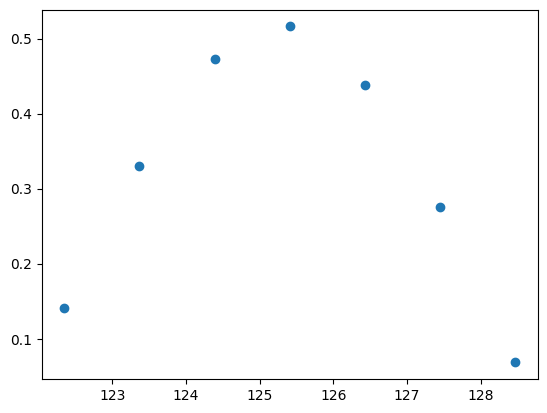

In [22]:
plt.scatter(dist_pts, z)

In [31]:
p_value = chi2.sf(q, df=1)
print( f'p-value: {p_value}')


p-value: 2.600598310467957e-11


In [67]:
m_arr = np.linspace(122.1,126.5,20)

q_arr,z_arr = [],[]

for m in m_arr:
    
    m0 = m
    
    L1 = likelihood((0, nu_b_fin), pts)
    L2 = likelihood((nu_s_fin, nu_b_fin), pts)
    q = 2*(L1 - L2)
    z = np.sqrt(q)
    
    q_arr.append(q)
    z_arr.append(z)
    
    print(m0,q, z)

122.1 2.766205125430133 1.663191247400651
122.33157894736841 8.415074788907077 2.9008748316511483
122.56315789473683 14.384199833904859 3.7926507661403335
122.79473684210525 20.497723985055927 4.527441218288309
123.02631578947368 26.55418055545306 5.153074864142094
123.2578947368421 32.336119325773325 5.686485674454243
123.48947368421052 37.620359108259436 6.13354376427359
123.72105263157894 42.1881605090457 6.495241374194319
123.95263157894736 45.83485249854857 6.770144200720438
124.18421052631578 48.37866900820518 6.955477626173861
124.41578947368421 49.66868680511834 7.047601493069705
124.64736842105263 49.59177805733634 7.042143001767029
124.87894736842105 48.07842548849294 6.933860792408003
125.11052631578947 45.10715229000198 6.716185843914832
125.34210526315789 40.7072522265953 6.380223524814417
125.57368421052631 34.95950209995499 5.912656095187255
125.80526315789474 27.99459833774017 5.290992188402869
126.03684210526316 19.98915565776406 4.470923356283807
126.26842105263158 11

In [118]:
plt.figure(figsize = (8,5))

plt.scatter(m_arr,z_arr, marker = 'x', color = 'k', label = "Vypočtená signifikance")

plt.plot([122,127],[5,5], color = 'lightskyblue', linestyle = 'dashed', label = 'Prahová hondnota $z = 5$')
plt.plot([125.35,125.35],[1,8.5], color = 'cadetblue', linestyle = 'dashed', label = '$m_\mathrm{H} = 125.35$ GeV')


#plt.plot(x_range, gauss(x_range,b4,c4) ,lw = 1 , color = 'k', linestyle = 'dashed', label = r"$N = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(m_\mathrm{inv}-\mu)^{2}}{2\sigma^{2}}}$")

plt.legend(loc='upper left',fontsize=10)

plt.ylim(1,8.5)
plt.xlim(122,127)

plt.xticks(np.arange(122,127,.25), minor = True)
#plt.xticks(np.arange(70,110,5))
plt.yticks(np.arange(1,8.5,.25), minor = True)

plt.ylabel("$z$ " + "[-]", fontsize=11)
plt.xlabel("$m_\mathrm{inv}$ [GeV/c$^2$]", fontsize=11)

plt.savefig('z.pdf', bbox_inches = 'tight')
plt.show()

C:\Users\stepa\AppData\Local\Temp/ipykernel_12684/3042317232.py:24: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [86]:
p_value = chi2.sf(q_arr, df=1)
print( f'p-value: {p_value}')

p-value: [9.62741591e-02 3.72122487e-03 1.49047703e-04 5.97022008e-06
 2.56249605e-07 1.29680259e-08 8.59427615e-10 8.29003874e-11
 1.28654101e-11 3.51369545e-12 1.82028053e-12 1.89305390e-12
 4.09507643e-12 1.86542854e-11 1.76829694e-10 3.36634568e-09
 1.21654563e-07 7.78826079e-06 8.36155452e-04 1.85717533e-01]


In [119]:
plt.figure(figsize = (8,5))

plt.scatter(m_arr,p_value, marker = 'x', color = 'k', label = "Vypočtená signifikance")

plt.plot([122,127],[5*10**(-7),5*10**(-7)], color = 'lightskyblue', linestyle = 'dashed', label = '$p = 5 \cdot 10^{-7}$')
plt.plot([125.35,125.35],[10**(-12),10], color = 'cadetblue', linestyle = 'dashed', label = '$m_\mathrm{H} = 125.35$ GeV')


#plt.plot(x_range, gauss(x_range,b4,c4) ,lw = 1 , color = 'k', linestyle = 'dashed', label = r"$N = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(m_\mathrm{inv}-\mu)^{2}}{2\sigma^{2}}}$")

plt.legend(loc='upper center',fontsize=10)

plt.yscale('log')

plt.ylim(10**(-12),10)
plt.xlim(122,127)

plt.xticks(np.arange(122,127,.1), minor = True)
#plt.xticks(np.arange(70,110,5))
#plt.yticks(np.arange(10**(-12),10,), minor = True)

plt.ylabel("$p$ " + "[-]", fontsize=11)
plt.xlabel("$m_\mathrm{inv}$ [GeV/c$^2$]", fontsize=11)

plt.savefig('p.pdf', bbox_inches = 'tight')
plt.show()

C:\Users\stepa\AppData\Local\Temp/ipykernel_12684/1824180235.py:26: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


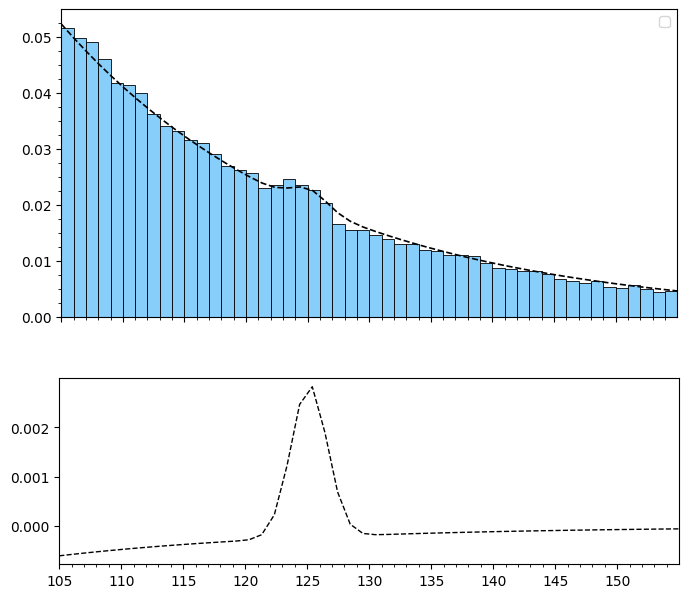

In [240]:
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(8, 8),sharex=True)

axs[0].hist(pts, nbins, density=True, edgecolor="k", lw = 0.6 ,color = 'lightskyblue', range=(x_min,x_max))
axs[0].plot(dist_pts, probability_density(dist_pts, nu_s_fin, nu_b_fin, m0, sigma) ,lw = 1.2 , color = 'k', linestyle = 'dashed')

axs[1].plot(dist_pts, probability_density(dist_pts, nu_s_fin, nu_b_fin, m0, sigma) - probability_density(dist_pts, 0, nu_b_fin, m0, sigma),lw = 1 , color = 'k', linestyle = 'dashed')

axs[0].legend(loc='upper right',fontsize=10)
axs[0].set_xlim(105,155)
axs[0].set_xticks(np.arange(105,155,1), minor = True)
axs[0].set_xticks(np.arange(105,155,5))
axs[0].set_yticks(np.arange(0,.055,.0025), minor = True)


#axs[1].set_box_aspect(0.1)

axs[0].set(box_aspect=.5)
axs[1].set(box_aspect=.3)

fig.subplots_adjust(hspace=0)

#plt.ylabel("$N$ " + "[-]", fontsize=11)
#plt.xlabel("$m_\mathrm{inv}$ [GeV]", fontsize=11)

#plt.savefig('Higgs.pdf', bbox_inches = 'tight')

#plt.show()

